### Importing the Libraries needed for EDA

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

1. Understand the dataset
2. Load the Dataset
3. Check for null values
4. see if the dataset is blanced or not
5. check for any duplicate rows
6. Remove the duplicate rows

### Understanding the dataset

Haberman dataset has data points from a study that was conducted from 1958 to 1970 on survival rate of the patients who had undergone surgery for breast cancer.

*Features of Haberman dataset:*

age: This tells us the age of the patient at the time of operation.

op_year: This tells us the year in which patient had an operation.

axil_nodes: They are also known as Auxiliary lymph nodes whose function is to filter fluids before they are eventually released into the bloodstream. Having cancer cells in Nodes tells us that the cancer might have spread to other parts of body as well.

sur_status: Label Feature has value of 1,2 where 2 corresponds to the patient who survived for less than 5 years and 1 corresponds to patient who survived more than 5 years post operation.

In [2]:
# reference: https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673

#### Load haberman.csv into a pandas DataFrame

Since the dataset is a csv file, use read_csv() method

In [3]:
df = pd.read_csv('haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


#### Inspecting the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


*Observation :*<br>Here we can see that we need to add the column names to the dataFrame

#### Adding the column name

After inspecting the dataFrame we saw that there is no column name mentioned in the dataFrame, so we need to add the column name to the dataFrame.

In [5]:
df = pd.read_csv('haberman.csv',names=['age', 'op_year', 'axil_node', 'sur_status'])
df.head()

,age,op_year,axil_node,sur_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Find out the total number of datapoints and features in the dataset

In [6]:
df.shape

(306, 4)

*Observation :*<br> 
    There are total 305 numbers of datapoints and 4 numbers of features

#### Check for null values

In [7]:
df.isnull().sum()

age           0
op_year       0
axil_node     0
sur_status    0
dtype: int64

*Obsevation :*<br>Haberman dataset has no missing values

#### Find any duplicate rows

In [8]:
df[df.duplicated()]

,age,op_year,axil_node,sur_status
23,37,63,0,1
27,38,60,0,1
52,41,65,0,1
65,43,64,0,2
78,44,61,0,1
108,48,58,11,2
132,50,61,0,1
179,54,62,0,1
184,55,58,1,1
196,56,60,0,1


In [9]:
len(df[df.duplicated()])

17

#### Drop duplicates

In [10]:
df = df.drop_duplicates()
df.shape # This gives the total number of the rows after preprocessing

(289, 4)

#### Data summary

In [11]:
df.describe()

,age,op_year,axil_node,sur_status
count,289.000000,289.000000,289.000000,289.000000
mean,52.422145,62.906574,4.221453,1.273356
std,10.876915,3.275794,7.325239,0.446455
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,5.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


*Observatio :*<br>
1. Patient age is from 30 to 83
2. Avarage age of the patient is 53
3. op_year  have data from 1958 to 1969
4. More than 75% of patient has less than 5 nodes

#### Find out the unique vale of sur_status column

In [12]:
df['sur_status'].unique()

array([1, 2], dtype=int64)

*Observation :*<br>
- 1 corresponds to patient who survived more than 5 years post operation
- 2 corresponds to the patient who survived for less than 5 years post operation

#### Distribution of class labels

In [13]:
df['sur_status'].value_counts()

1    210
2     79
Name: sur_status, dtype: int64

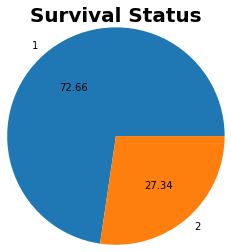

In [14]:
# Pie char of Distribution of class labels
plt.pie(df['sur_status'].value_counts(), labels=df['sur_status'].value_counts().index,radius=1.25,autopct='%.2f')
plt.title('Survival Status',fontweight='bold',fontsize=20)
plt.show()

- 72.66 % Patients are survived more than 5 years
- 27.34 % Patients are not survived more than 5 years
 
This shows that Haberman dataset is an imbalanced dataset

### Exploratory Data Analysis

- Univariate analysis - PDF, CDF, Boxplot, Violin Plot
- Bivariate analysis - Pair Plot, Scatter Plot
- Multivariate analysis - Contours

### Univariate analysis -using single feature of DataFrame

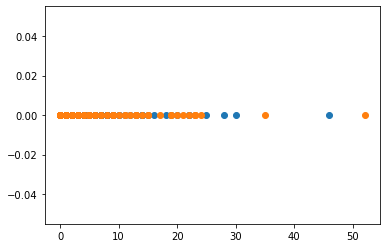

In [15]:
haberman_Long_Survive = df.loc[df['sur_status'] == 1];
haberman_Short_Survive = df.loc[df['sur_status'] == 2];
plt.plot(haberman_Long_Survive['axil_node'], np.zeros_like(haberman_Long_Survive['axil_node']), 'o')
plt.plot(haberman_Short_Survive['axil_node'], np.zeros_like(haberman_Short_Survive['axil_node']), 'o')
plt.show()

*Observation :*
Here you can observe the data of short survival status are mostly overlap on long survival status due to which you will not able to conclude on this data.

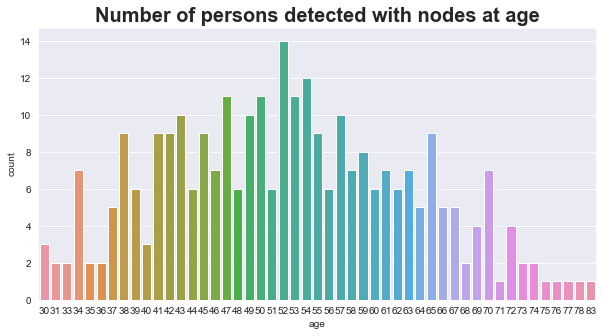

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Number of persons detected with nodes at age',fontweight='bold',fontsize=20)
sns.countplot(x='age',data=df)
plt.show();

*Observation :*
   - From this countplot we can see that the age at which maximum no of persons detected with positive nodes is 52 as it was the mean too.
   - The maximum chances of positive nodes is between the age of 38 to 66 
   - The minimum chances of developing the minimum nodes is from 30 to 33 and 75 to 83

#### Histogram

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


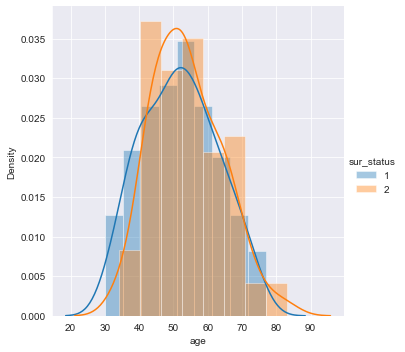

In [17]:
# age
sns.FacetGrid(df,hue='sur_status',size=5) \
   .map(sns.distplot,'age') \
   .add_legend();
plt.show();

*Observation :*

   - Major overlapping is observed in this PDF
   - This shows that the age parameter can't be used to distinguish between a person's survival chance
   - so we need to use different parameters to get a better and clearer conclusion

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


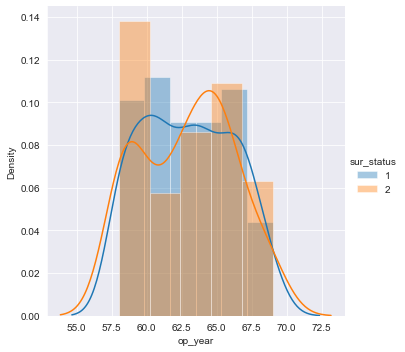

In [18]:
# op_year
sns.FacetGrid(df,hue='sur_status',size=5) \
   .map(sns.distplot,'op_year') \
   .add_legend();
plt.show();

*Observation :*
   - Major overlapping is observed in this PDF
   - This shows that the aop_year parameter can't be used to distinguish between a person's survival chance
   - so we need to use different parameters to get a better and clearer conclusion

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


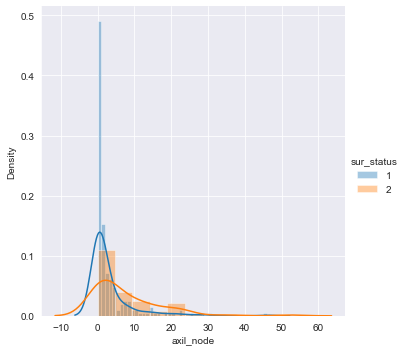

In [19]:
# Axil_node
sns.FacetGrid(df,hue='sur_status',size=5) \
   .map(sns.distplot,'axil_node') \
   .add_legend();
plt.show();

*Observation :*
   - There is some overlapping in this PDF but there is a clear cut conclusion which we can draw from here.
   - The chance of survival of persons eith 0 to 1 node is is the heighest.
   - Thgrater number of nodes the lesser are the chances of survival.
   - after 20th node the chances of survival are very very low.

#### PDF and CDF

In [20]:
survived=df[df['sur_status']==1]
not_survived=df[df['sur_status']==2]

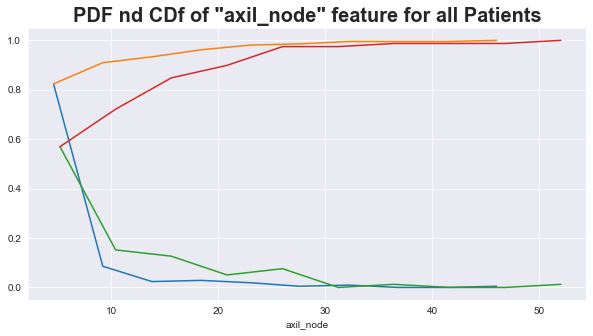

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
counts,bin_edges=np.histogram(survived['axil_node'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(not_survived['axil_node'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.title('PDF nd CDf of "axil_node" feature for all Patients',fontweight='bold',fontsize=20)
plt.xlabel('axil_node')
plt.show();

*Observation :*
   - From this CDF it is clear that 82% of patients survived who had nodes between 0-6
   - From this CDF it is clear that 58% of patients did not survived who had nodes between 0-6


### Bivariate analysis -using two features of DataFrame

#### 2-D Scatter Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


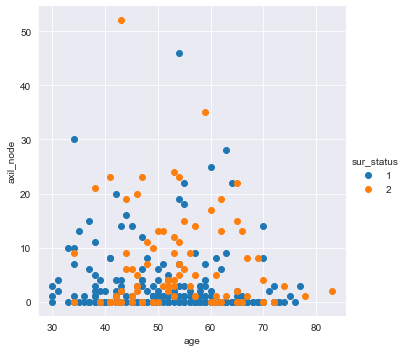

In [22]:
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='sur_status',size=5) \
   .map(plt.scatter,'age','axil_node') \
   .add_legend();
plt.show();

*Observation :*
   - The survival chances of the patients of sur_status 1 is maximum when there is between 30 to 40 irrespective of the number of nodes.
   - From this scatter plot we can see the sur_status 2 pateints  lie much denser in the region between the age of 50<age<60 and theregion y-axis is from 2<axil_node<15
   - age>80 servival chances of the patients is 0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


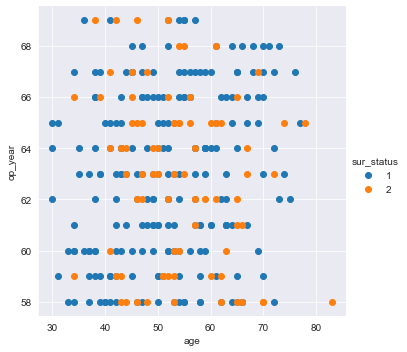

In [23]:
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='sur_status',size=5) \
   .map(plt.scatter,'age','op_year') \
   .add_legend();
plt.show();

*Observation :*
   - From this plot no concrete conclusion can be drawn because of overlapping.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


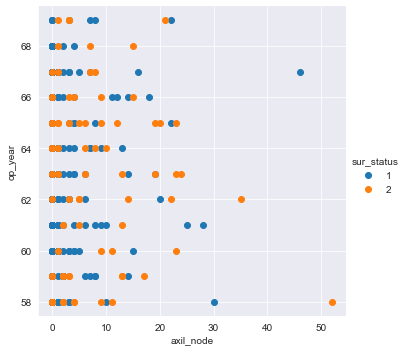

In [24]:
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='sur_status',size=5) \
   .map(plt.scatter,'axil_node', 'op_year') \
   .add_legend();
plt.show();

*Observation :*
   - From this plot no concrete conclusion can be drawn because of overlapping.

#### Pair Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


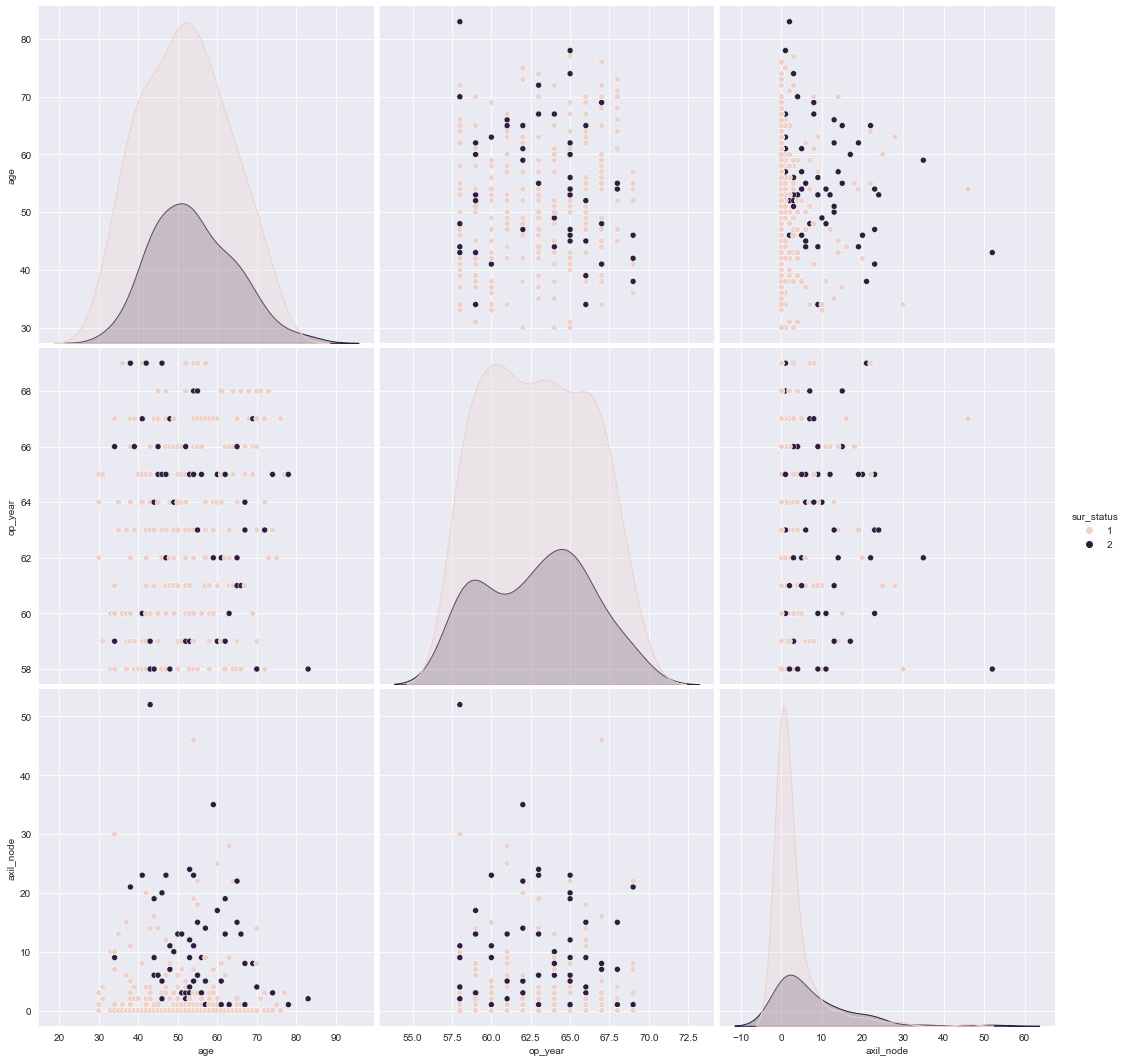

In [25]:
sns.set_style('darkgrid')

sns.pairplot(df, hue='sur_status',size=5)
plt.show();

*Observation :*
   - We can see that the feature compared with each other have no relevance and meaning except for the pair in wich age and axil_node are compared.

#### Box Plot

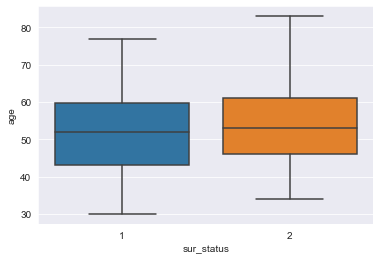

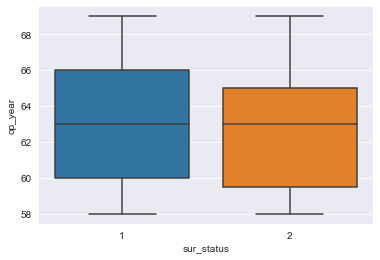

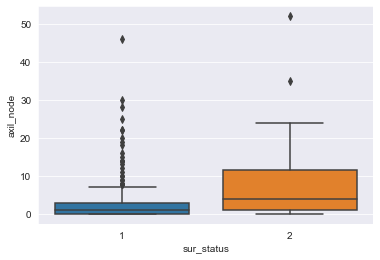

In [26]:
sns.boxplot(x='sur_status',y='age',data=df)
plt.show();
sns.boxplot(x='sur_status',y='op_year',data=df)
plt.show();
sns.boxplot(x='sur_status',y='axil_node',data=df)
plt.show();

#### Violin Plot

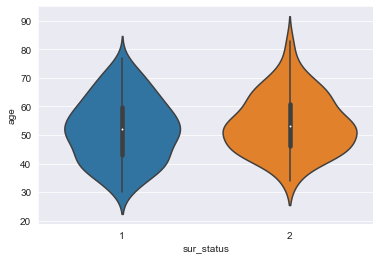

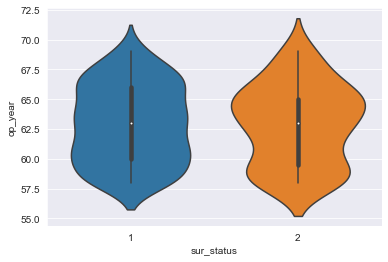

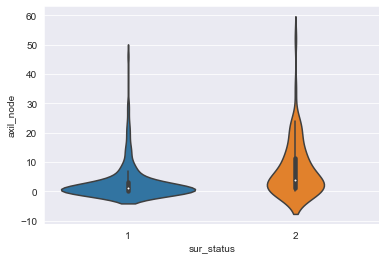

In [27]:
sns.violinplot(x='sur_status',y='age',data=df)
plt.show();
sns.violinplot(x='sur_status',y='op_year',data=df)
plt.show();
sns.violinplot(x='sur_status',y='axil_node',data=df)
plt.show();

*Obsrvation :*
   - From boxplot and violinplot we get some rough classification values but still we can't classify the based on a particular threshold.
   - Patients who did not surive the oparation are quiet larger when the axil_node is more than 0.
   - The age between which patients did not survive is comparitively larger in the range between 45<age<55.

### Multivariate analysis - Contours

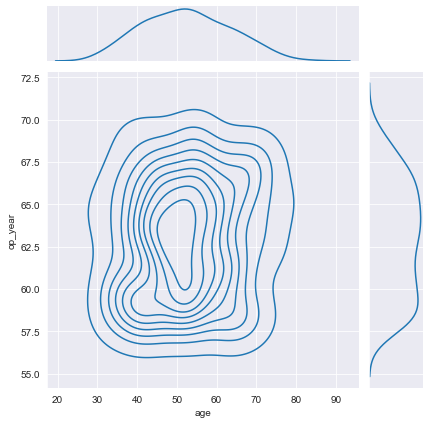

In [28]:
sns.jointplot(x='age',y='op_year',data=df,kind='kde')
plt.show();

*Observatio :*
   - Here in this contour plot we can observe that the depth is largest in between 42<age<55 for y-axis 1959<op_year<1965
   - which indicates a lot of patients were underwent surgery within the age of 42 to55 from year 1959 to 1965

*Conclusion :*
   - The objective was to classify a patient based on its survival status using its features such as date of operation,age at which operation took place,Number of positive auxillary nodes found in the patient and survival status.Patient's age and year of operation is completely independent and are not the factors which can classify them into a seperate category.We have also seen that the chances of survival of patient decreases with increase in the number of auxillary positive nodes,but there also exceptional cases where even patients with low or no positve nodes died within 5 years.From some data visualizations it can be said that the age can act as a factor of survival chance.The young patients have a high chance of survival compared to the adults and old patients as we saw in the univariate analysis case.Hence,no robust conclusion can be drawn from this visualizations and analysis as they are not the factors which can decide the chances of survival of a new patient